Code written by: Billy Atkinson (watkinson@umces.edu) \
Paper Citation: Mason, E., A. Pascual, and J. C. McWilliams, 2014: A new sea surface height–based code for oceanic mesoscale eddy tracking. J. Atmos. Oceanic Technol., 31, 1181–1188, doi:10.1175/JTECH-D-14-00019.1. \
Source Code: __[Pixels inside/outside Eddies Documentation](https://py-eddy-tracker.readthedocs.io/en/latest/python_module/06_grid_manipulation/pet_hide_pixel_out_eddies.html#sphx-glr-python-module-06-grid-manipulation-pet-hide-pixel-out-eddies-py)__ \
Date of last revision: 08/10/2022 

In [4]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import datetime as dt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress
import numpy.ma as ma
import glob
import os
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.observations.observation import EddiesObservations

In [100]:
#cycl_eddy_mask(cycl,file,variable,inside,outside,title,vmin,vmax,cb_label):
sat_files = sorted(glob.glob('/data/watkinson/Fall2022/Sat_data/1day_regrid/*.nc'))
#sat_files = sat_files[0:8]
anti_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Anticyclonic/Anticyclonic_*.nc'))

cycl_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Cyclonic/Cyclonic_*.nc'))

#anti_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/Original_eddies/Anticyclonic/Anticyclonic_*.nc'))

#cycl_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/Original_eddies/Cyclonic/Cyclonic_*.nc'))

cycl_chlor_mean = list()
anti_chlor_mean = list()

n=1
while n < len(sat_files):
#cycl_eddy_mask(c,sat_data,"chlor_a",False,True,"Chlorophyll Concentration Inside of Eddies",0,.2,"Chlorophyl(mg * $m^{-3}$)'")
######set plotting parameters
    from matplotlib.path import Path
    from numpy import ones
    from py_eddy_tracker.poly import create_vertice
    
    a = EddiesObservations.load_file(anti_files[n])
    ######Cyclonic data

    c = EddiesObservations.load_file(cycl_files[n])
    #print(c)


    ###### Sat data
    sat_data = RegularGridDataset((sat_files[n]),
        "lon",
        "lat")

    ######code for creating mask for values inside the eddy contour
    x_name_cycl, y_name_cycl = c.intern(False)# We will use the outter effective contour and not the inner speed contour
    adt_cycl = sat_data.grid("npp")
    mask_cycl = ones(adt_cycl.shape, dtype="bool")#creates boolean array to use in masking values for cyclonic eddies
       
    ######takes the vertice points that defines the Cyclonic eddy edge and finds i,j pixels within those vertices
    for eddy in c:
        i, j = Path(create_vertice(eddy[x_name_cycl], eddy[y_name_cycl])).pixels_in(sat_data)
        mask_cycl[i, j] = False
    adt_cycl.mask[:] = mask_cycl #apply the mask to the data that you want to investigate
        
    adt_cycl = adt_cycl.mask.astype(int)
    sat_data2 = xr.open_dataset((sat_files[n]))
    chlor_cycl = sat_data2.npp
    adt_cycl = np.transpose(adt_cycl)
    phyto_cycl = chlor_cycl * adt_cycl
    phyto_cycl = phyto_cycl.where(phyto_cycl != 0)
    #print(phyto)
    mean_cycl = np.nanmean(phyto_cycl)
    mean_cycl = np.atleast_1d(np.array(mean_cycl))
    cycl_chlor_mean = np.concatenate([cycl_chlor_mean,mean_cycl])
    
    ######code for creating mask for values outside the eddy contour
    x_name_anti, y_name_anti = a.intern(False)# We will use the outter effective contour and not the inner speed contour
    adt_anti = sat_data.grid("npp")
    mask_anti = ones(adt_anti.shape, dtype="bool")#creates boolean array to use in masking values for anticyclonic eddies
    ######takes the vertice points that defines the eddy edge and finds i,j pixels outside of those vertices
    for eddy in a:
        i, j = Path(create_vertice(eddy[x_name_anti], eddy[y_name_anti])).pixels_in(sat_data)
        mask_anti[i, j] = False
    adt_anti.mask[:] = mask_anti
    
    adt_anti = adt_anti.mask.astype(int)
    sat_data2 = xr.open_dataset((sat_files[n]))
    chlor_anti  = sat_data2.npp
    adt_anti  = np.transpose(adt_anti)
    phyto_anti  = chlor_anti  * adt_anti 
    phyto_anti  = phyto_anti.where(phyto_anti  != 0)
    #print(phyto)
    mean_anti = np.nanmean(phyto_anti)
    mean_anti  = np.atleast_1d(np.array(mean_anti ))
    anti_chlor_mean = np.concatenate([anti_chlor_mean,mean_anti])
    
    n=n+1



We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030102.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030103.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030104.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030105.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030106.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030107.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030108.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030109.nc
We assume pixel position of grid is cent

In [101]:
print(np.shape(anti_chlor_mean))
series = pd.Series(cycl_chlor_mean)
series2 = pd.Series(anti_chlor_mean)
#print("Daily-averaged Mean Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",series2.describe())
#print("Daily-averaged Mean Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",series.describe())
#print("Daily-averaged Mean Phyto. Carbon Biomass inside Anticyclonic Eddy Statistical Summary:\n",series2.describe())
#print("Daily-averaged Mean Phyto. Carbon Biomass inside Cyclonic Eddy Statistical Summary:\n",series.describe())
print("Daily-averaged Mean NPP inside Anticyclonic Eddy Statistical Summary:\n",series2.describe())
print("Daily-averaged Mean NPP inside Cyclonic Eddy Statistical Summary:\n",series.describe())

(1456,)
Daily-averaged Mean NPP inside Anticyclonic Eddy Statistical Summary:
 count    1456.000000
mean      489.018659
std        54.105445
min       250.584529
25%       456.654749
50%       486.171174
75%       521.768018
max       810.246556
dtype: float64
Daily-averaged Mean NPP inside Cyclonic Eddy Statistical Summary:
 count    1456.000000
mean      484.657171
std        52.903182
min       248.720087
25%       451.650880
50%       481.915175
75%       516.561563
max       801.189862
dtype: float64


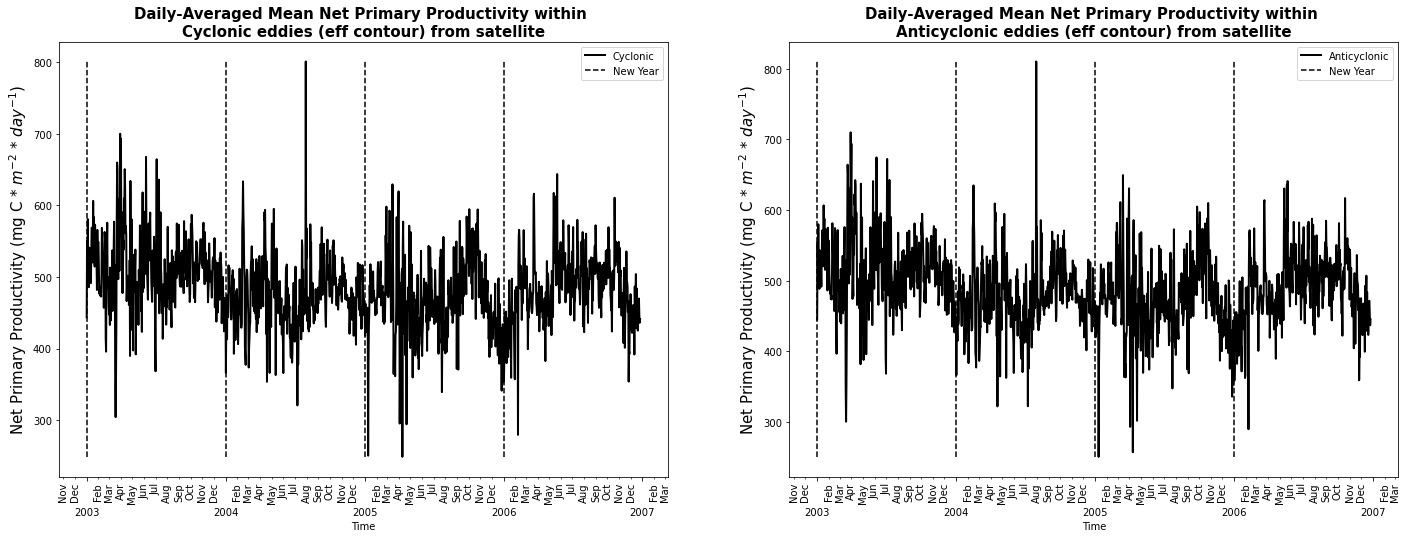

In [102]:
start = dt.datetime(2003,1,1)
new_dates = [start + dt.timedelta(days=i) for i in range(1456)]

#print(new_dates)

x = new_dates
#x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
import matplotlib.dates as mdates
xfmt_major=mdates.DateFormatter('\n\n%Y')
xfmt_minor=mdates.DateFormatter('%b')
#xfmt_major=mdates.DateFormatter('%b')
#xfmt_minor=mdates.DateFormatter('%d')
months=mdates.MonthLocator()
years=mdates.YearLocator()
#days=mdates.DayLocator(interval=15)
#fig = plt.figure(figsize=(12, 8), dpi=80)
#ax = fig.add_axes([.03,.03,.8,.8])
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
#ax1.set_title('Average Small Zooplankton Biomass within \nAnticyclonic eddies from model',loc='center',fontsize=15,fontweight='bold')
#ax2.set_title('Average Small Zooplankton Biomass within \nCyclonic eddies from model',loc='center',fontsize=15,fontweight='bold')
#ax1.set_title('Max and Min Chlorphyll within \nAnticyclonic eddies from  satellite',loc='center',fontsize=15,fontweight='bold')
#ax2.set_title('Max and Min Chlorphyll within \nCyclonic eddies from satellite',loc='center',fontsize=15,fontweight='bold')
#ax1.set_title('Daily-Averaged Mean Chlorophyll within GoM-tuned \nCyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
#ax2.set_title('Daily-Averaged Mean Chlorophyll within GoM-tuned \nAnticyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
#ax1.set_title('Daily-Averaged Mean Phytoplankton Carbon Biomass \nCyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
#ax2.set_title('Daily-Averaged Mean Phytoplankton Carbon Biomass \nAnticyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
ax1.set_title('Daily-Averaged Mean Net Primary Productivity within \nCyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
ax2.set_title('Daily-Averaged Mean Net Primary Productivity within \nAnticyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
#ax1.set_ylim(0,3)
#ax2.set_ylim(100,700)
#plt.title('Average Small Zooplankton Biomass within eddies from model',loc='center',fontsize=15,fontweight='bold')#,y=1.03)
ax1.plot(x,cycl_chlor_mean,label='Cyclonic',color='k',lw=2)#,alpha=.5)
#ax1.plot(x,anti_chlor_mean_max,label='Anticyclonic',color='k',lw=2)#,alpha=.5)
ax2.plot(x,anti_chlor_mean,label='Anticyclonic',color='k',lw=2)#,alpha=.5)
#ax1.plot(x,cycl_chlor_mean_max,label='Cyclonic',color='red',lw=2,alpha=.5)
#ax2.plot(x,cycl_chlor_mean_min,label='Cyclonic',color='red',lw=2,alpha=.5)
'''
ax3 = ax1.twinx()
ax4 = ax2.twinx()
ax3.plot(x,cycl_eddies.effective_radius.resample('D').mean(), label='Amplitude',color='blue',lw=2,alpha=.5)
ax3.plot(x,anti_eddies.effective_radius.resample('D').mean(), label='Amplitude',color='green',lw=2,alpha=.5)
ax4.plot(x,cycl_eddies.effective_radius.resample('D').mean(), label='Amplitude',color='blue',lw=2,alpha=.5)
ax4.plot(x,anti_eddies.effective_radius.resample('D').mean(), label='Amplitude',color='green',lw=2,alpha=.5)
'''
ax1.vlines(x=['2003-01-01','2004-01-01','2005-01-01','2006-01-01'],
          ymin=np.min(cycl_chlor_mean), ymax=np.max(cycl_chlor_mean),colors='k',ls='--',label='New Year')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(xfmt_major)
#ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_minor_formatter(xfmt_minor)
plt.setp(ax1.xaxis.get_minorticklabels(), rotation=90)
ax1.set_xlabel('Time')
#ax1.set_ylabel('Chl (mg * $m^{-3}$)',fontsize=15)
#ax1.set_ylabel('Phyto. Cabon Biomass (mg C * $m^{-3}$)',fontsize=15)
ax1.set_ylabel('Net Primary Productivity (mg C * $m^{-2}$ * $day^{-1}$)',fontsize=15)
ax1.legend(loc='best')

ax2.vlines(x=['2003-01-01','2004-01-01','2005-01-01','2006-01-01'],
          ymin=np.min(anti_chlor_mean), ymax=np.max(anti_chlor_mean),colors='k',ls='--',label='New Year')
ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(xfmt_major)
#ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax2.xaxis.set_minor_locator(months)
ax2.xaxis.set_minor_formatter(xfmt_minor)
plt.setp(ax2.xaxis.get_minorticklabels(), rotation=90)
ax2.set_xlabel('Time')
#ax2.set_ylabel('Chl (mg * $m^{-3}$)',fontsize=15)
#ax2.set_ylabel('Phyto. Cabon Biomass (mg C * $m^{-3}$)',fontsize=15)
ax2.set_ylabel('Net Primary Productivity (mg C * $m^{-2}$ * $day^{-1}$)',fontsize=15)
ax2.legend(loc='best')
#ax3.set_ylabel('Amplitude (meters)',fontsize=15)
#ax4.set_ylabel('Amplitude (meters)',fontsize=15)
plt.show()